**Name: Panthil Patel**
**Class: MLAI-6B Batch:B  ERP NO.: 23SE02ML134  Practical: 03**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
print("=" * 60)
print("K-NEAREST NEIGHBORS CLASSIFICATION - PRACTICAL")
print("=" * 60)


K-NEAREST NEIGHBORS CLASSIFICATION - PRACTICAL


In [6]:
print("\n1. Loading Iris Dataset...")
iris = load_iris()
X = iris.data
y = iris.target

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("\nDataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"\nFeature names: {iris.feature_names}")
print(f"Class names: {iris.target_names}")

print("\nFirst 5 rows of data:")
print(df.head())

print("\nClass distribution:")
print(df['species'].value_counts())


1. Loading Iris Dataset...

Dataset Information:
Number of samples: 150
Number of features: 4
Number of classes: 3

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class names: ['setosa' 'versicolor' 'virginica']

First 5 rows of data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [7]:
print("\n" + "=" * 60)
print("2. Splitting Data (80% train, 20% test)...")
print("=" * 60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")



2. Splitting Data (80% train, 20% test)...
Training set size: 120 samples
Testing set size: 30 samples


In [8]:
print("\n" + "=" * 60)
print("3. Feature Scaling (Standardization)...")
print("=" * 60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed using StandardScaler")
print("Formula: z = (x - mean) / std")


3. Feature Scaling (Standardization)...
Feature scaling completed using StandardScaler
Formula: z = (x - mean) / std


In [9]:
print("\n" + "=" * 60)
print("4. Training K-Nearest Neighbors Classifier...")
print("=" * 60)

k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(X_train_scaled, y_train)

print(f"KNN Classifier trained with k={k} neighbors")
print(f"Distance metric: Euclidean")


4. Training K-Nearest Neighbors Classifier...
KNN Classifier trained with k=5 neighbors
Distance metric: Euclidean


In [10]:
print("\n" + "=" * 60)
print("5. Making Predictions...")
print("=" * 60)

y_pred = knn.predict(X_test_scaled)

print("Predictions on test set:")
print(f"Actual:    {y_test[:10]}")
print(f"Predicted: {y_pred[:10]}")


5. Making Predictions...
Predictions on test set:
Actual:    [0 2 1 1 0 1 0 0 2 1]
Predicted: [0 2 1 1 0 1 0 0 2 1]


In [11]:
print("\n" + "=" * 60)
print("6. Model Evaluation...")
print("=" * 60)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


6. Model Evaluation...

Accuracy: 0.9333 (93.33%)

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


In [12]:
print("\n" + "=" * 60)
print("7. Finding Optimal K Value...")
print("=" * 60)

k_values = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)

    train_acc = knn_temp.score(X_train_scaled, y_train)
    test_acc = knn_temp.score(X_test_scaled, y_test)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

best_k = k_values[np.argmax(test_accuracies)]
best_accuracy = max(test_accuracies)

print(f"\nBest k value: {best_k}")
print(f"Best test accuracy: {best_accuracy:.4f}")


7. Finding Optimal K Value...

Best k value: 1
Best test accuracy: 0.9667



8. Generating Visualizations...
Visualizations saved as 'knn_analysis.png'


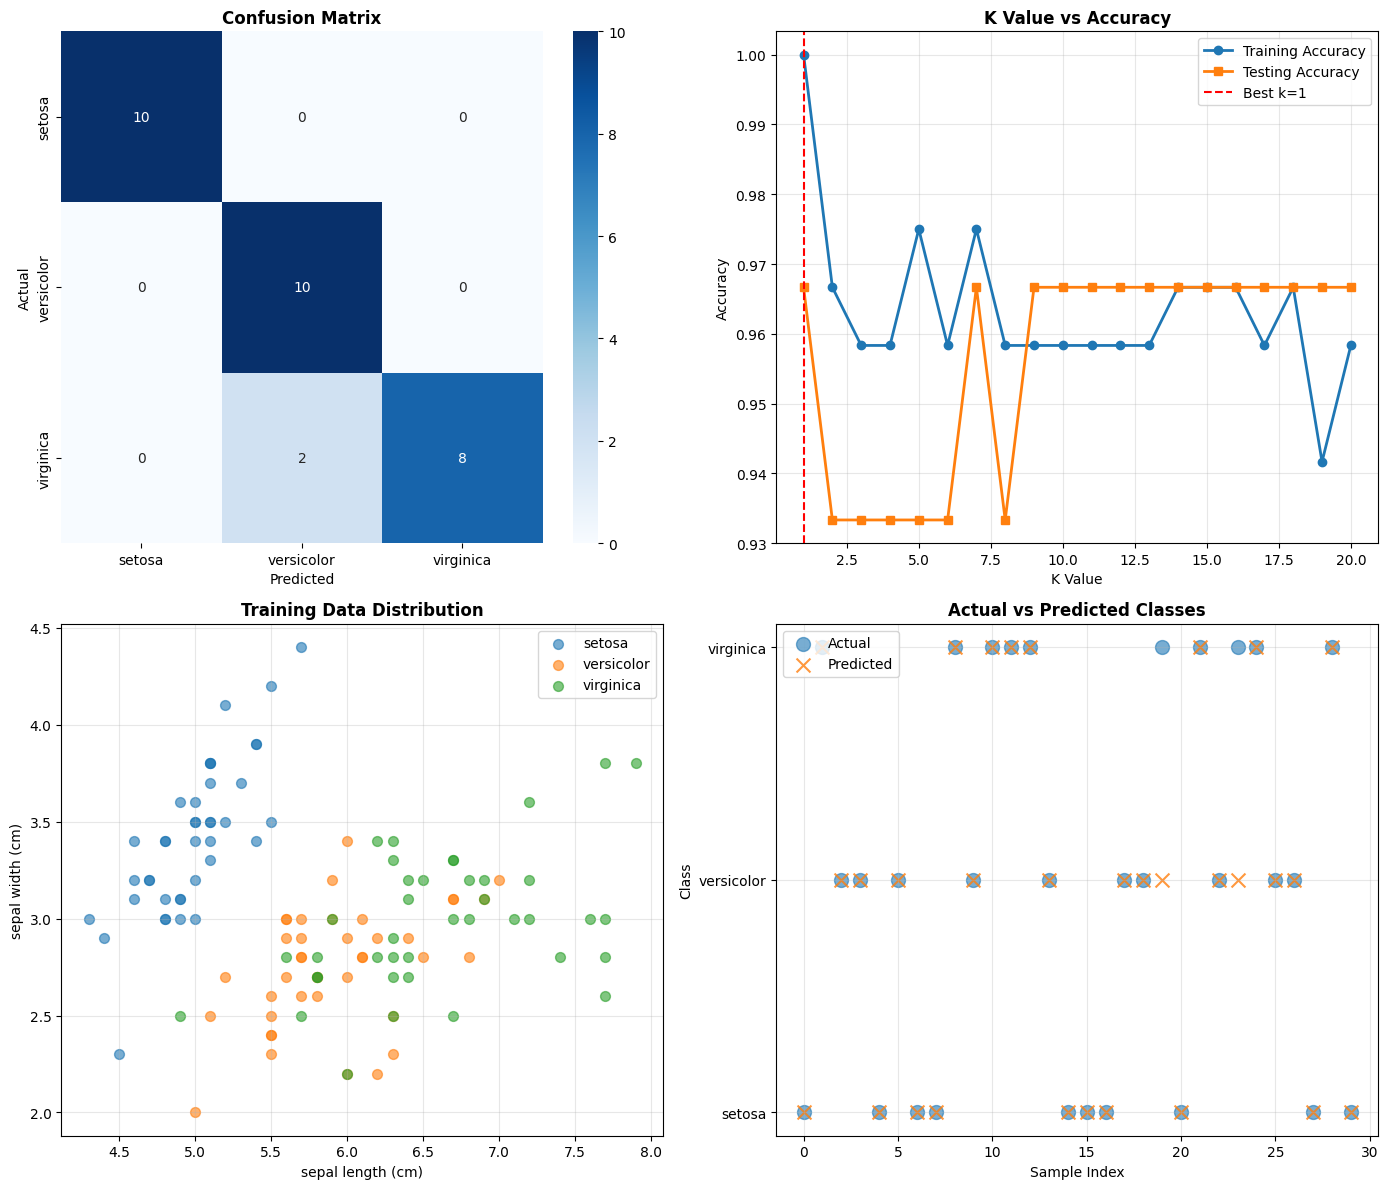

In [13]:
print("\n" + "=" * 60)
print("8. Generating Visualizations...")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names, ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_xlabel('Predicted')

# Plot 2: K vs Accuracy
axes[0, 1].plot(k_values, train_accuracies, marker='o', label='Training Accuracy', linewidth=2)
axes[0, 1].plot(k_values, test_accuracies, marker='s', label='Testing Accuracy', linewidth=2)
axes[0, 1].axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
axes[0, 1].set_xlabel('K Value', fontsize=10)
axes[0, 1].set_ylabel('Accuracy', fontsize=10)
axes[0, 1].set_title('K Value vs Accuracy', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Feature Scatter Plot (First 2 features)
for i, species in enumerate(iris.target_names):
    mask = y_train == i
    axes[1, 0].scatter(X_train[mask, 0], X_train[mask, 1],
                       label=species, alpha=0.6, s=50)
axes[1, 0].set_xlabel(iris.feature_names[0], fontsize=10)
axes[1, 0].set_ylabel(iris.feature_names[1], fontsize=10)
axes[1, 0].set_title('Training Data Distribution', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Prediction Results
axes[1, 1].scatter(range(len(y_test)), y_test, label='Actual', marker='o', s=100, alpha=0.6)
axes[1, 1].scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x', s=100, alpha=0.8)
axes[1, 1].set_xlabel('Sample Index', fontsize=10)
axes[1, 1].set_ylabel('Class', fontsize=10)
axes[1, 1].set_title('Actual vs Predicted Classes', fontsize=12, fontweight='bold')
axes[1, 1].set_yticks([0, 1, 2])
axes[1, 1].set_yticklabels(iris.target_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('knn_analysis.png', dpi=300, bbox_inches='tight')
print("Visualizations saved as 'knn_analysis.png'")
plt.show()


In [14]:
print("\n" + "=" * 60)
print("9. Example: Predicting New Sample...")
print("=" * 60)

# Create a new sample
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Looks like setosa
new_sample_scaled = scaler.transform(new_sample)

prediction = knn.predict(new_sample_scaled)
probabilities = knn.predict_proba(new_sample_scaled)

print(f"\nNew sample features: {new_sample[0]}")
print(f"Predicted class: {iris.target_names[prediction[0]]}")
print(f"\nClass probabilities:")
for i, prob in enumerate(probabilities[0]):
    print(f"  {iris.target_names[i]}: {prob:.4f} ({prob*100:.2f}%)")

print("\n" + "=" * 60)
print("KNN CLASSIFICATION COMPLETED SUCCESSFULLY!")
print("=" * 60)


9. Example: Predicting New Sample...

New sample features: [5.1 3.5 1.4 0.2]
Predicted class: setosa

Class probabilities:
  setosa: 1.0000 (100.00%)
  versicolor: 0.0000 (0.00%)
  virginica: 0.0000 (0.00%)

KNN CLASSIFICATION COMPLETED SUCCESSFULLY!
